# **CI Course - EX6**

--------

--------


## Theory Overview ##
### Intro to ML ###

What is **Machine-Learning**?

Machine learning is a broader field that encompasses the development and application of algorithms that enable machines to learn and improve from data without being explicitly programmed. This can include **supervised learning**, where models are trained on labeled data to make predictions, or **unsupervised** learning, where models identify patterns in data without specific guidance.

![sup_vs_unsup.png](attachment:9e34d88c-de7e-45f9-96d1-e4774075df80.png)

---


### Exersice - Regression task ###

What is the **regression** task?

Regression is a type of machine learning task that involves predicting a continuous numerical value based on input features. The goal of regression is to create a model that can accurately predict the output value for new input data.


**The basic idea** is to use a set of training data to learn the relationship between the input variables (independent variables) and the output variable (dependent variable).</br>

The relationship can be presented as a linear function which are calculated using the training data **to minimizes a loss function that represent the differences between the predicted values and the actual values**.</br> Once the relationship is calculated, we can use it to make predictions for new data.


In this exercise we will develop a simple regressor.<br/>
- The **input** will be a samples of ocean's **depth** and water **temprature** values which recorded from sensors and saved in a dataset.<br/>
- The **output** will be the prediction of the ocean's **Salinity** value.

- We are expecting that the prediction output will be the linear function of:
$$ \hat{y} =  {W^T}x = w_1x_1 + w_2x_2$$ 

Where $x$ is the [depth,temp] vector, $\hat{y}$ is the salinity output and $W$ is the weights=the coefficients of $x$ that creating the linear relationship.

So what exactly is being learned here??
<br/>**$W$ is a learnable variables!**

But how??

First we will define the function that measures the distance from the ground truth data:

- The Loss function will be **Mean Squered Error** (MSE):
$$L = {1 \over M}\sum_{i=1}^{M}(y_i-\hat{y})^2$$

**Now we want to minimize the loss with relate to the weights!**

But how??

Quick reminder:<br/>
***GD (gradient descent)*** - optimization aproach that iteratively moves in the direction of steepest descent in the loss function to find the minimum.

So now we can define the updating equation of $W$ as:

$$W_{updated} = W_{now}-{\alpha}{\nabla{L}}$$ 

Where:<br/>
$$\nabla{L}= \frac{\partial L}{\partial W} ={-2 \over M}\sum_{i=1}^{M}{x_i}(y_i-\hat{y}) $$ 

And:  $${\alpha} = LearningRate $$ 

- One of the two **optimizers**, **GD** or **SGD**, will be used to determine which is more effective for the task.

**SGD briefly:**

Stochastic Gradient Descent (SGD) is a popular optimization algorithm in ML which updates the model's parameters based on the **gradient of a random subset** of the training data, making it **faster than traditional gradient descent** when dealing with large datasets.

![SGD.png](attachment:8330a640-f21e-4eb9-91b3-3e91803f7bee.png)


---

### Solution ###


#### Import libraries and load the sensors data ####

The dataset is saved in a python 'pickle' format. <br/>
For more information on this subject, see: [Understanding Python Pickling with example](https://www.geeksforgeeks.org/understanding-python-pickling-example/)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import pickle
import time

# Load oceanic dataset
# Data is normalized
data = pickle.load(file=open('dataset/dataset.pkl', "rb")) # "rb" means - open the file in binary format for reading
X = data['data'] # [depth, water temperature]
Y = data['target'] # [Salinity of water]
print(f"X shape is: {X.shape}")
print("X vector:")
print(X)
print("----")
print(f"Y shape is: {Y.shape}")
print("Y vector:")
print(Y)

FileNotFoundError: ignored

#### Splitting the data into training and test sets ####

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape is {X_train.shape} | y_train shape is {y_train.shape} ")
print(f"X_test shape is {X_test.shape} | y_test shape is {y_test.shape} ")

X_train shape is (8000, 2) | y_train shape is (8000,) 
X_test shape is (2000, 2) | y_test shape is (2000,) 


#### Define helper functions ####

In [ ]:
# Loss = MSE
def Loss(y, y_pred): 
    M = len(y)
    S = 0
    for i in range(M):
        S += (y[i] - y_pred[i])**2
    return (1/M) * S

#derivative of loss w.r.t weight
def dLoss_dW(x, y, y_pred):
    M = len(y)
    S = 0
    for i in range(M):
        S += -x[i] * (y[i] - y_pred[i])
    return (2/M) * S

# code for "wx+b" 
def predict(W, X):
    Y_p = []
    for x in X:
        Y_p.append(W.dot(x))
    return np.array(Y_p)

# Get random batch for Stochastic GD
def get_batch(X, y, batch_size = 500):
    ix = np.random.choice(X.shape[0], batch_size)
    return X[ix, :], y[ix]

#### Initialize parameters and implement training loop ####


In [ ]:
Wu = np.random.randn(X.shape[1]) # Initial weigth vector
learning_rate = 0.01
epochs = 1000

SGD = False # Use Stochastic GD?

time0 = time.time()
L_train = []
L_test = []
for i in range(epochs):
     # Get data
    if not SGD:
        X_batch, y_batch = X_train, y_train
    else:
        X_batch, y_batch = get_batch(X_train, y_train)
    
    Y_p = predict(Wu, X_batch)
    
    # update the weights
    Wu = Wu - learning_rate * dLoss_dW(X_batch, y_batch ,Y_p)  # Update weights

    L_train.append(Loss(y_batch, Y_p))
    L_test.append(Loss(y_test, predict(Wu, X_test)))
    time_cur = time.time()

print('Weights: ', Wu)
print('Train loss: ', L_train[-1])
print('Test loss: ', L_test[-1])
print(f'Training time: {time_cur-time0:.2f}[secs]')

Weights:  [0.76559532 0.75910341]
Train loss:  0.038387110027720626
Test loss:  0.03810216175253929
Training time: 4.32[secs]


#### Plot Learning Curve ####

What is **learning curve**?

A learning curve is a plot of model performance (e.g., accuracy or loss) against the amount of training data used.<br/>It can be used to identify if the model is underfitting or overfitting, to evaluate the effectiveness of different models, and to determine if more training data is needed to improve model performance.

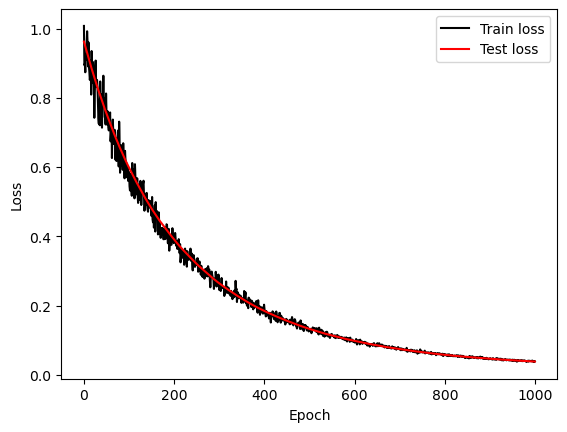

In [ ]:
###### Plot learning curve ######

plt.figure()
plt.plot(L_train, '-k', label = 'Train loss')
plt.plot(L_test, '-r', label = 'Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#### Plot the fitted plane ####

So the final fitted model is of the form:

$$ \hat{y} = w_0x_{depth} + w_1x_{temp} $$

Reminds you of something?

Yes indeed! its a seems our model is functionnig as a **plane** surface equation.<br/>
lets plot our model plane! 

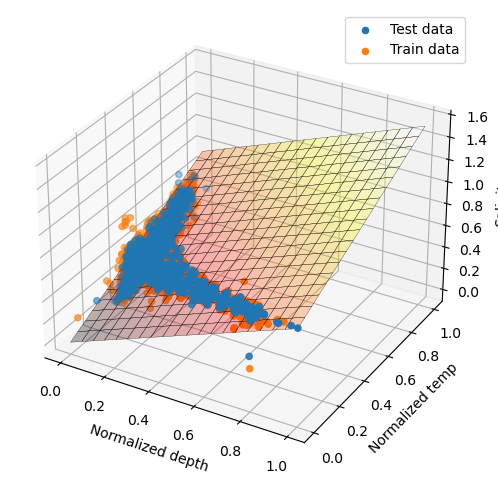

In [ ]:
##### Plot fitted plane ######

res = 20 # resolution
x = X_test[:, 0] # depth
y = X_test[:, 1] # temp
z = y_test # salinity - ground truth

x_s = np.linspace(min(x), max(x), res)
y_s = np.linspace(min(y), max(y), res)
x_s, y_s = np.meshgrid(x_s, y_s)

z_s = np.zeros((len(x_s), len(y_s)))
for i in range(len(x_s)):
    for j in range(len(y_s)):
        z_s[i, j] = predict(Wu, np.array([x_s[i,j], y_s[i,j]]).reshape(1,-1))

fig = plt.figure(2, figsize=(6,6))
ax = plt.axes(projection='3d')

ax.plot_surface(x_s, y_s, z_s, cmap=cm.hot, alpha=0.3, linewidth=0.2, edgecolors='black')
ax.scatter(x, y, z, label='Test data')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, label='Train data')
ax.set_xlabel('Normalized depth')
ax.set_ylabel('Normalized temp')
ax.set_zlabel('Salinity')
ax.legend()
plt.show()

---


## Summary ##

In this class we covered:


1. Focusing on the regression task.
2. We then proceeded to develop a model for a 'Salinity' regression problem using Python.
4. In addition, we explored the impact of using stochastic gradient descent versus standard gradient descent during the training process.
5. Finally, we examined the learning curve and plotted the regression model's learning curve and fitted plane.

What a day!

---

## Helpful and extra links ##

1. 3Blue1Brown - [But what is a neural network? | Chapter 1](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) --> good one
2. [Learning Curves In Machine Learning](https://www.youtube.com/watch?v=nt5DwCuYY5c)

---